ABHISHEK BASU
abasu9
uin: 658369163
P1

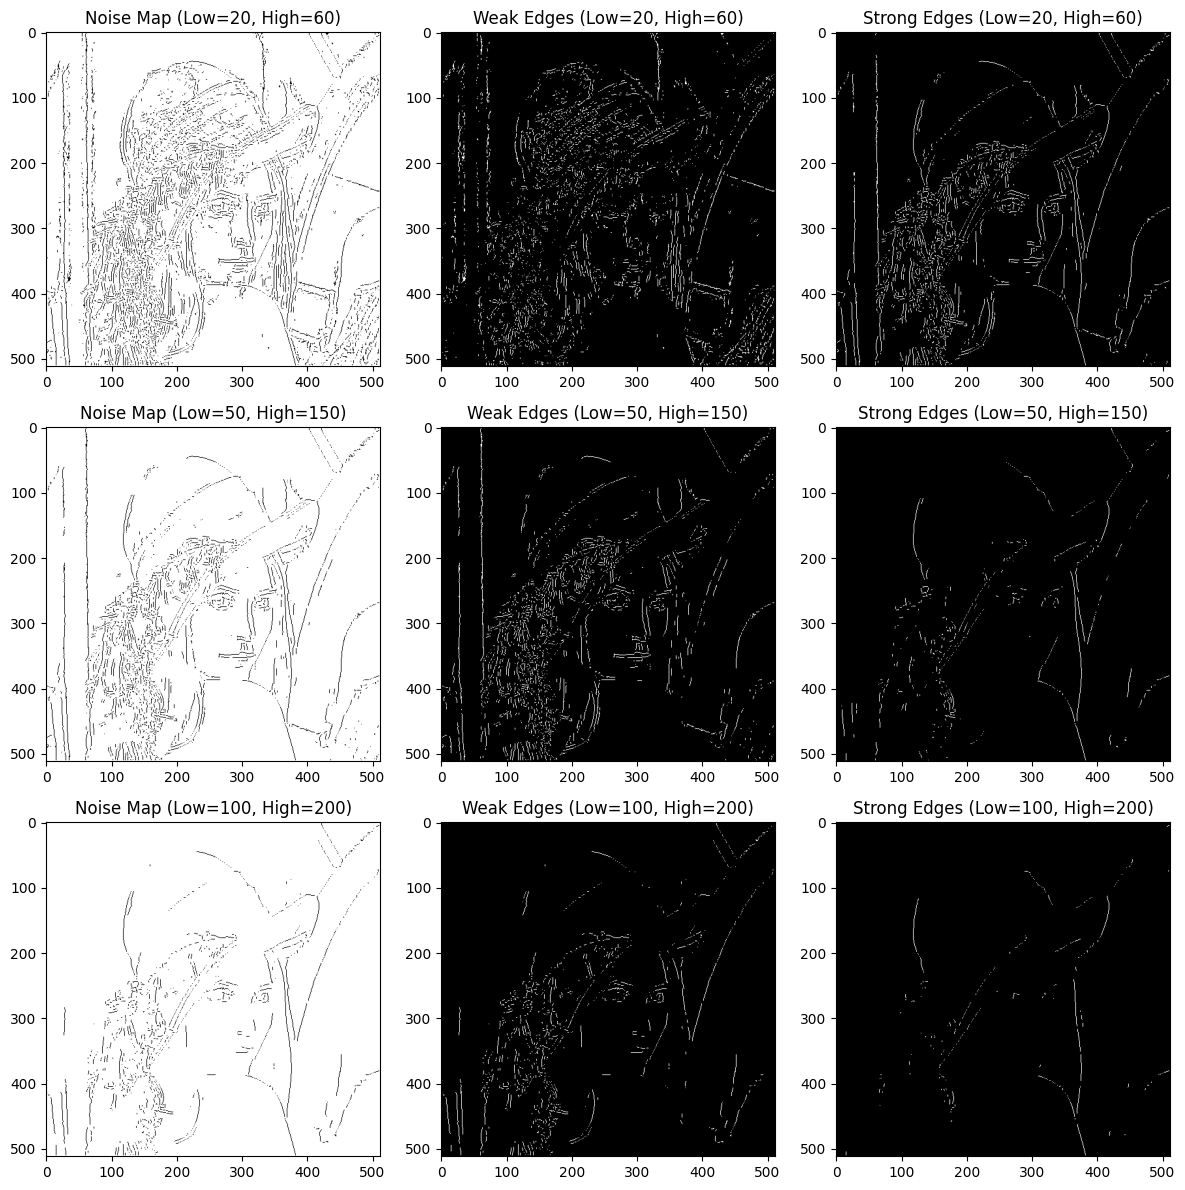

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 1/lena.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Compute gradients using Sobel filters
Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate magnitude and direction of gradient
magnitude = np.sqrt(Gx**2 + Gy**2)
direction = np.arctan2(Gy, Gx)

# Step 3: Non-Maximum Suppression
def non_maximum_suppression(magnitude, direction):
    M, N = magnitude.shape
    output = np.zeros((M, N), dtype=np.float32)
    angle = direction * 180.0 / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255
                
                # Angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = magnitude[i, j+1]
                    r = magnitude[i, j-1]
                # Angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = magnitude[i+1, j-1]
                    r = magnitude[i-1, j+1]
                # Angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = magnitude[i+1, j]
                    r = magnitude[i-1, j]
                # Angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = magnitude[i-1, j-1]
                    r = magnitude[i+1, j+1]

                if magnitude[i, j] >= q and magnitude[i, j] >= r:
                    output[i, j] = magnitude[i, j]
                else:
                    output[i, j] = 0
            except IndexError:
                pass
    return output

nms_image = non_maximum_suppression(magnitude, direction)

# Step 4: Hysteresis Thresholding
def hysteresis_thresholding(image, low_thresh, high_thresh):
    M, N = image.shape
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(image >= high_thresh)
    weak_i, weak_j = np.where((image <= high_thresh) & (image >= low_thresh))
    
    output = np.zeros((M, N), dtype=np.int32)
    output[strong_i, strong_j] = strong
    output[weak_i, weak_j] = weak

    # Track edges by hysteresis
    for i in range(1, M-1):
        for j in range(1, N-1):
            if output[i, j] == weak:
                if (output[i+1, j-1] == strong or output[i+1, j] == strong or output[i+1, j+1] == strong
                        or output[i, j-1] == strong or output[i, j+1] == strong
                        or output[i-1, j-1] == strong or output[i-1, j] == strong or output[i-1, j+1] == strong):
                    output[i, j] = strong
                else:
                    output[i, j] = 0
    return output

# Step 5: Test with three different threshold sets
thresholds = [(20, 60), (50, 150), (100, 200)]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

for idx, (low, high) in enumerate(thresholds):
    edges = hysteresis_thresholding(nms_image, low, high)

    noise_map = nms_image < low
    weak_edges_map = (nms_image >= low) & (nms_image < high)
    strong_edges_map = nms_image >= high
    
    axes[3 * idx].imshow(noise_map, cmap='gray')
    axes[3 * idx].set_title(f'Noise Map (Low={low}, High={high})')
    
    axes[3 * idx + 1].imshow(weak_edges_map, cmap='gray')
    axes[3 * idx + 1].set_title(f'Weak Edges (Low={low}, High={high})')
    
    axes[3 * idx + 2].imshow(strong_edges_map, cmap='gray')
    axes[3 * idx + 2].set_title(f'Strong Edges (Low={low}, High={high})')

plt.tight_layout()
plt.show()


P2

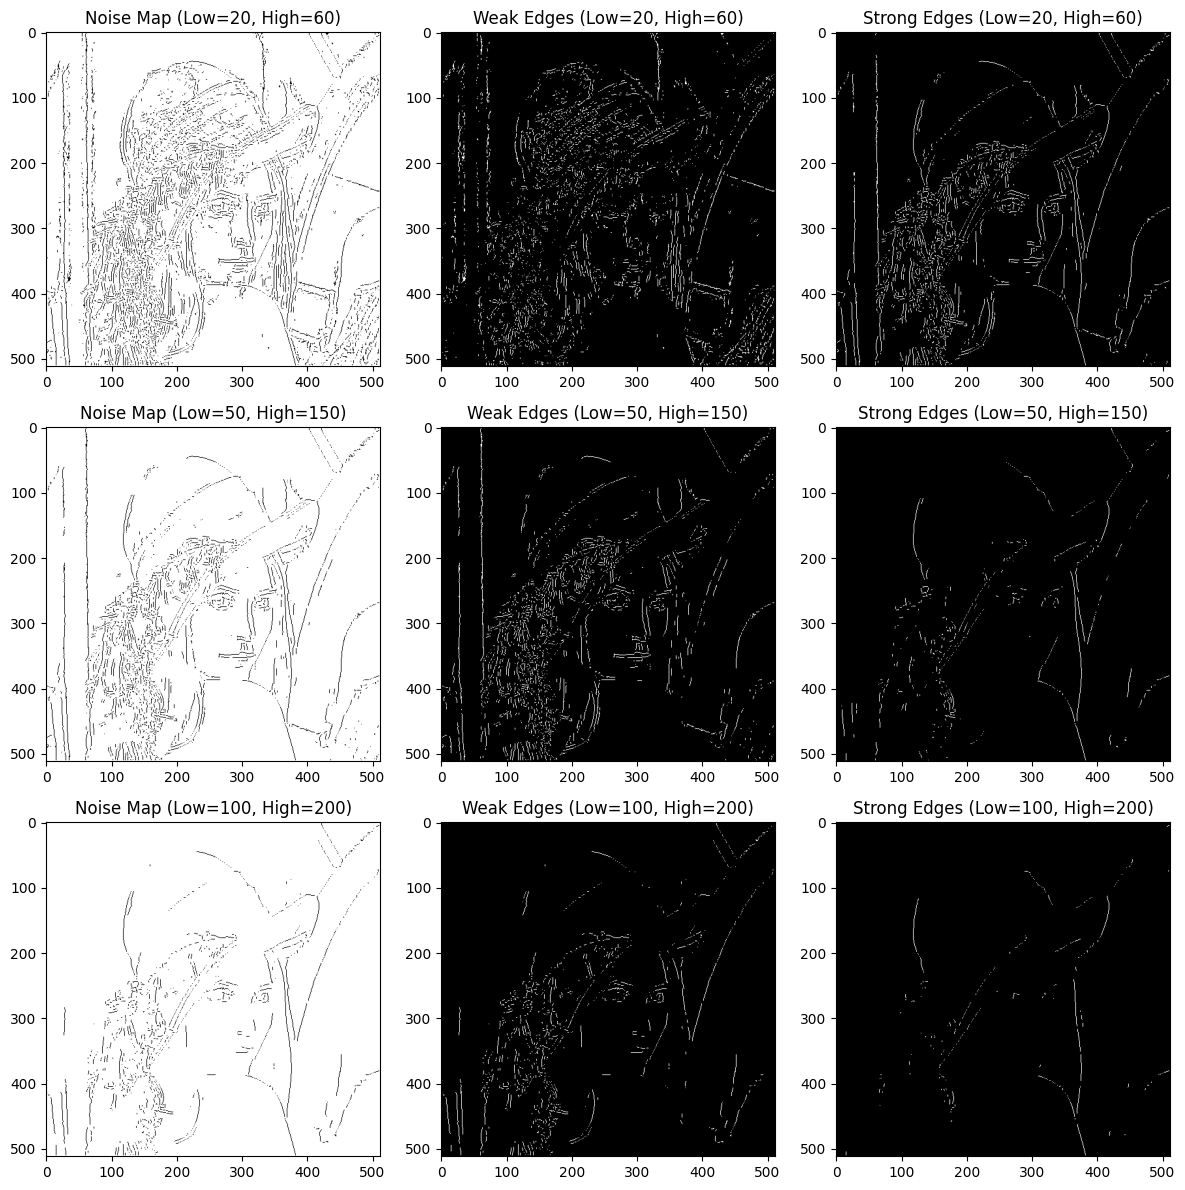

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 1/lena.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Compute gradients using Sobel filters
Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate magnitude and direction of gradient
magnitude = np.sqrt(Gx**2 + Gy**2)
direction = np.arctan2(Gy, Gx)

# Step 3: Non-Maximum Suppression
def non_maximum_suppression(magnitude, direction):
    M, N = magnitude.shape
    output = np.zeros((M, N), dtype=np.float32)
    angle = direction * 180.0 / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255
                
                # Angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = magnitude[i, j+1]
                    r = magnitude[i, j-1]
                # Angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = magnitude[i+1, j-1]
                    r = magnitude[i-1, j+1]
                # Angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = magnitude[i+1, j]
                    r = magnitude[i-1, j]
                # Angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = magnitude[i-1, j-1]
                    r = magnitude[i+1, j+1]

                if magnitude[i, j] >= q and magnitude[i, j] >= r:
                    output[i, j] = magnitude[i, j]
                else:
                    output[i, j] = 0
            except IndexError:
                pass
    return output

nms_image = non_maximum_suppression(magnitude, direction)

# Step 4: Hysteresis Thresholding with Edge Linking
def hysteresis_thresholding(image, low_thresh, high_thresh):
    M, N = image.shape
    weak = 25  # Weak edge threshold
    strong = 255  # Strong edge threshold
    
    strong_i, strong_j = np.where(image >= high_thresh)
    weak_i, weak_j = np.where((image <= high_thresh) & (image >= low_thresh))
    
    output = np.zeros((M, N), dtype=np.int32)
    output[strong_i, strong_j] = strong
    output[weak_i, weak_j] = weak

    # Link weak edges to strong edges using a 4-connectivity approach
    for i, j in zip(strong_i, strong_j):
        # Check the 8-connected neighbors of each strong edge pixel
        for x in range(-1, 2):
            for y in range(-1, 2):
                if x == 0 and y == 0:
                    continue
                if (0 <= i + x < M) and (0 <= j + y < N):
                    if output[i + x, j + y] == weak:
                        output[i + x, j + y] = strong

    # Remove weak edges that are not connected to strong edges
    output[output == weak] = 0
    
    return output

# Step 5: Test with three different threshold sets
thresholds = [(20, 60), (50, 150), (100, 200)]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

for idx, (low, high) in enumerate(thresholds):
    edges = hysteresis_thresholding(nms_image, low, high)

    noise_map = nms_image < low
    weak_edges_map = (nms_image >= low) & (nms_image < high)
    strong_edges_map = nms_image >= high
    
    axes[3 * idx].imshow(noise_map, cmap='gray')
    axes[3 * idx].set_title(f'Noise Map (Low={low}, High={high})')
    
    axes[3 * idx + 1].imshow(weak_edges_map, cmap='gray')
    axes[3 * idx + 1].set_title(f'Weak Edges (Low={low}, High={high})')
    
    axes[3 * idx + 2].imshow(strong_edges_map, cmap='gray')
    axes[3 * idx + 2].set_title(f'Strong Edges (Low={low}, High={high})')

plt.tight_layout()
plt.show()


P3

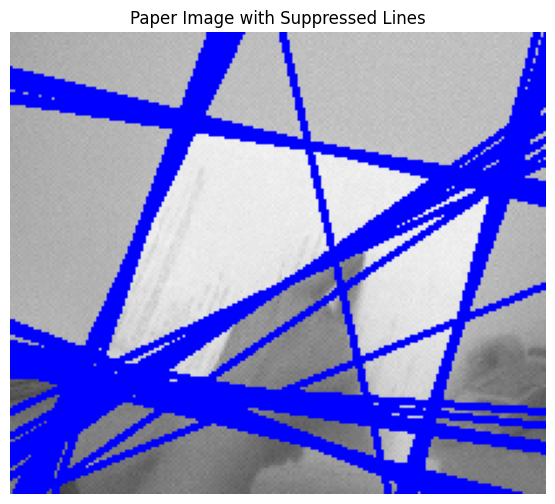

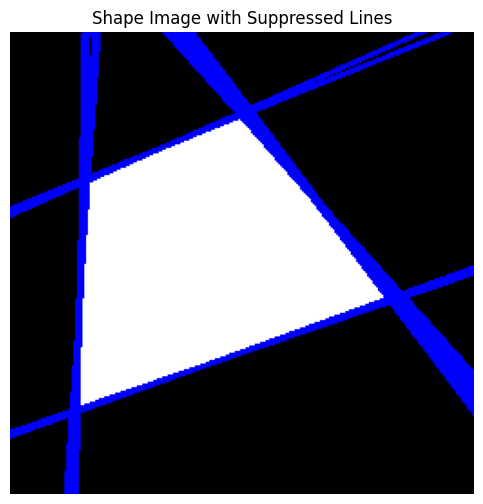

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_maximum_suppression(lines, threshold):
    suppressed_lines = []
    votes = np.zeros((1000, 180), dtype=int)

    # Count votes for each line
    for line in lines:
        if line is not None:
            rho, theta = line[0]
            votes[int(rho), int(theta)] += 1

    # Identify local maxima
    for line in lines:
        if line is not None:
            rho, theta = line[0]
            if votes[int(rho), int(theta)] >= threshold:
                suppressed_lines.append(line)

    return suppressed_lines

def draw_lines(image, lines):
    for line in lines:
        if line is not None:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

def show_image(title, image):
    """Display the image using matplotlib."""
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

def main():
    # Load the images
    paper_image = cv2.imread('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 2/paper.bmp', cv2.IMREAD_GRAYSCALE)
    shape_image = cv2.imread('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 2/shape.bmp', cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    paper_image_blur = cv2.GaussianBlur(paper_image, (5, 5), 0)
    shape_image_blur = cv2.GaussianBlur(shape_image, (5, 5), 0)

    # Perform edge detection with lower thresholds
    edges_paper = cv2.Canny(paper_image_blur, 30, 100)
    edges_shape = cv2.Canny(shape_image_blur, 30, 100)

    # Apply Hough Transform with a lower threshold
    detected_lines_paper = cv2.HoughLines(edges_paper, 1, np.pi / 180, 30)
    detected_lines_shape = cv2.HoughLines(edges_shape, 1, np.pi / 180, 30)

    # Check for detected lines before applying non-maximum suppression
    suppressed_lines_paper = non_maximum_suppression(detected_lines_paper, threshold=5) if detected_lines_paper is not None else []
    suppressed_lines_shape = non_maximum_suppression(detected_lines_shape, threshold=5) if detected_lines_shape is not None else []

    # Create copies of the original images to draw lines on
    paper_with_lines = cv2.cvtColor(paper_image, cv2.COLOR_GRAY2BGR)
    shape_with_lines = cv2.cvtColor(shape_image, cv2.COLOR_GRAY2BGR)

    # Draw the original detected lines (if any)
    if detected_lines_paper is not None:
        draw_lines(paper_with_lines, detected_lines_paper)

    if detected_lines_shape is not None:
        draw_lines(shape_with_lines, detected_lines_shape)

    # Draw the suppressed lines
    draw_lines(paper_with_lines, suppressed_lines_paper)
    draw_lines(shape_with_lines, suppressed_lines_shape)

    # Show results using matplotlib
    show_image('Paper Image with Suppressed Lines', paper_with_lines)
    show_image('Shape Image with Suppressed Lines', shape_with_lines)

if __name__ == "__main__":
    main()


P4 
PART A

lena.png loaded successfully.


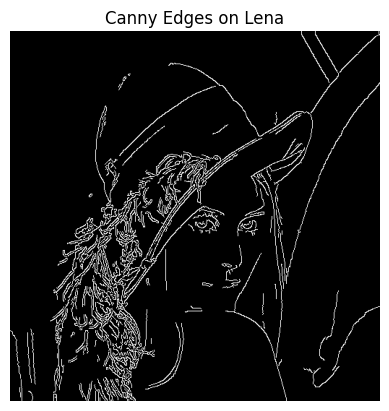

In [7]:
import cv2
import matplotlib.pyplot as plt

# Function to display images using matplotlib
def display_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load lena.png image in grayscale
lena_img = cv2.imread('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 1/lena.png', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if lena_img is None:
    print("Error: Could not load lena.png.")
else:
    print("lena.png loaded successfully.")

# Apply Canny Edge Detection with specific parameters
canny_edges_lena = cv2.Canny(lena_img, 100, 200)

# Display the result
display_image(canny_edges_lena, "Canny Edges on Lena")


PART B

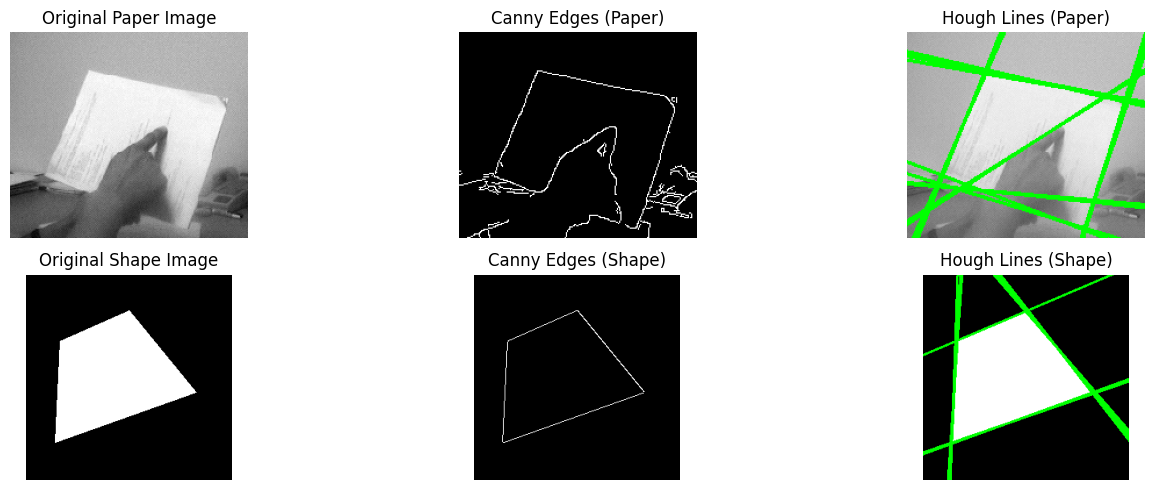

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Hough Transform
def apply_hough_lines(image_path, rho, theta, threshold):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply Canny edge detection
    edges = cv2.Canny(image, 50, 150)  # Using default Canny parameters
    
    # Apply Hough Line Transform
    lines = cv2.HoughLines(edges, rho, theta, threshold)
    
    # Create an output image to draw lines on
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw lines on the output image
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return image, edges, output_image

# Parameters for Hough Transform
rho = 1  # Distance resolution in pixels
theta = np.pi / 180  # Angle resolution in radians
threshold = 45  # Minimum number of votes to consider a line

# Apply Hough Transform to paper.bmp
paper_image, paper_edges, paper_hough = apply_hough_lines('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 2/paper.bmp', rho, theta, threshold)

# Apply Hough Transform to shape.bmp
shape_image, shape_edges, shape_hough = apply_hough_lines('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 2/shape.bmp', rho, theta, threshold)

# Display results for paper.bmp
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(paper_image, cmap='gray')
plt.title('Original Paper Image')
plt.axis('off')

# Canny edges
plt.subplot(2, 3, 2)
plt.imshow(paper_edges, cmap='gray')
plt.title('Canny Edges (Paper)')
plt.axis('off')

# Hough Lines
plt.subplot(2, 3, 3)
plt.imshow(paper_hough)
plt.title('Hough Lines (Paper)')
plt.axis('off')

# Display results for shape.bmp
plt.subplot(2, 3, 4)
plt.imshow(shape_image, cmap='gray')
plt.title('Original Shape Image')
plt.axis('off')

# Canny edges
plt.subplot(2, 3, 5)
plt.imshow(shape_edges, cmap='gray')
plt.title('Canny Edges (Shape)')
plt.axis('off')

# Hough Lines
plt.subplot(2, 3, 6)
plt.imshow(shape_hough)
plt.title('Hough Lines (Shape)')
plt.axis('off')

plt.tight_layout()
plt.show()